![Image of Yaktocat](https://i0.wp.com/ctbeertours.com/wp-content/uploads/2016/07/kickstarter-website-banner.jpg?fit=955%2C328)

Kickstarter jest to uruchomiona w 2009 roku platforma, poświęcona crowdfundingowi, czyli społecznościowym zbiórkom pieniędzy. Finansowane są tam projekty takie jak filmy, animacje, gry komputerowe, karciane, planszowe, komiksy, albumy muzyczne, a także projekty związane ze sztuką, modą, fotografią, publicystyką, teatrem, tańcem, jedzeniem oraz nowoczesnymi technologiami.Osoby, które chcą wesprzeć projekt wpłacają pieniądze. Jeśli w ustalonym czasie uda się zebrać zadeklarowaną przez pomysłodawców kwotę, pieniądze – po potrąceniu prowizji serwisu – są im wypłacane. Gdy wymagana kwota nie zostanie zebrana, pieniądze wracają do osób, które wsparły projekt.

<font size="6">Top 5 najbardziej dochodowych projektów.</font>

#### 1. W 2015 urządzenie Pebble Time uzyskało dotację w wysokości 20.338.986 USD.
<img src="https://ksr-ugc.imgix.net/assets/012/032/069/46817a8c099133d5bf8b64aad282a696_original.png?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463725702&auto=format&frame=1&q=92&s=43b2da867d3cc18964d8279d13e9f575\" width="500" align="center">

#### 2. W 2014 wynalazek Coolest Cooler, czyli multichłodziarka zebrał 13.285.226 USD oraz doczekał się wpisu na Wikipedii.
<img src="https://ksr-ugc.imgix.net/assets/011/595/682/65a3f1f355d79198457b6d66526c0e88_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463684988&auto=format&frame=1&q=92&s=5cb24bb172d07c304bc2e1e480708f9e" width="500" align="center">

#### 3. W 2 lata później, w 2016, kolejna wersja Pebble 2, Time 2 zyskała popularność oraz 12.779.843 USD dotacji.
<img src="https://ksr-ugc.imgix.net/assets/011/244/931/2430b84825e9c8e64d6b17faa20d2cb9_original.png?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1464876220&auto=format&frame=1&q=92&s=b0d0b243cdbb45eb61ef90cec2c77d35" width="500" align="center">

#### 4. Kingdom Death: Monster 1.5 - ta planszowa gra fantasy, z pięknymi figurkami, uzbierała 12.393.139 USD.

<img src="https://cdn-images-1.medium.com/max/2600/1*bimzWvqK0SQU_ROpLIPnjA.jpeg" width="500" align="center">

#### 5. Pebble E-Paper Watch for iPhone and Android - trzecia odsłona zegarka zebrała 10.266.845 USD.
<img src="https://ksr-ugc.imgix.net/assets/011/334/500/5525884a63076aaa23356031e0b305c4_original.png?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463681170&auto=format&frame=1&q=92&s=329794cf5724313dedb592a595239f98" width="500" align="center">

Na platformie Kickstarter tylko niektórym projektom udaje się uzyskać tak wysokie dofinansowanie, aby ostatecznie doszło do produkcji oraz wypuszczenia produktu na rynek. Większości projektów niestety nie udaje się uzyskać założonej kwoty progowej. Korzystając z danych wyjściowych umieszczonych w serwisie Kaggle (https://www.kaggle.com/kemical/kickstarter-projects), postawiliśmy sobie za cel przewidzenie, które projekty zakonczą się sukcesem. 

Modelowanie ma na celu predykcję projektów, które otrzymają założoną przez twórców wynalazku kwotę dofinansowania.

In [50]:
import pandas as pd
import numpy as np
import string

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import BallTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML
import time
import warnings; warnings.simplefilter('ignore')


In [51]:
pd.set_option('display.max_columns', 12)
df = pd.read_csv('ks-projects-201801.csv')

In [52]:
print(df.shape)

(378661, 15)


# Omówienie datasetu

Dane wejściowe zawierają 15 cech (features), z których wyodrębniliśmy kluczowe dla uzyskania predykcji.
Kategorie uwzględnione w modelowaniu to 6 cech: 'main_category', 'launched','deadline', 'state', 'backers', 'usd_goal_real'.

Cechy te okreslają kolejno: 
1. main category - jedna z 15 kategorii, do której może być zaklasyfikowany projekt
2. launched - czas rozpoczęcia projektu, w analizie uwzględniamy dane do stycznia 2018 roku
3. deadline -  zaplanowana data zakończenia zbiórki czas zbiórki 
4. state - jeden z 6 statusów, dla modeli jest to predykowana cecha sukcesu (czy zbiórka się powiodła)
5. backers - liczba wspierających
6. usd_goal_real - kwota celu zbiórki wyrażona w dolarach. Z uwagi na zastosowanie aż 14 różnych walut w odniesienia do cechy "goal", w modelu uwzględniono cechę 'usd_goal_real' czyli wartość dającą się porównywać między walutami wyrażoną w dolarach amerykańskich. 

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [54]:
print(df.nunique())

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64


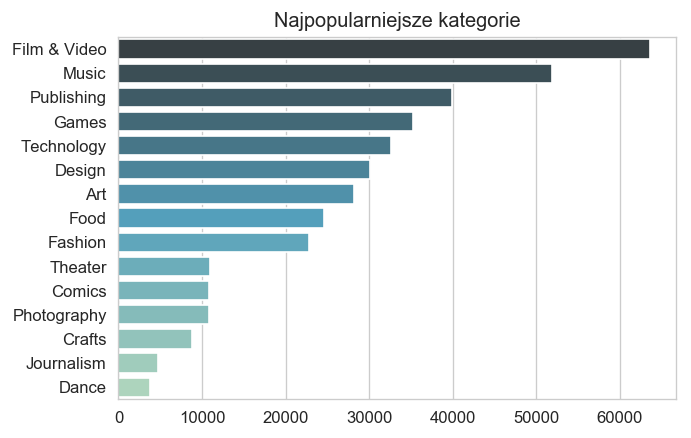

In [55]:
sns.set_style('whitegrid')
mains = df.main_category.value_counts().head(15)

x = mains.values
y = mains.index

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="GnBu_d")

plt.title('Najpopularniejsze kategorie')
plt.show()


Spośród 15 kategorii głównych, zdecydowanie największą popularnością wśród kickstarterowych projektów cieszy się branża kreatywno-technologiczna. Film&Video, Muzyka czy Design dominują, choć równie ważne miejsce zajmują biznesy związane z grami komputerowymi i planszowymi oraz nowinkami technologicznymi. 
Tradycyjne mniej techniczne działy kreatywne takie jak publikacje, sztuka, moda, teatr, fotografia czy komiks, a nawet rękodzieło znajdują się dużo dalej w rankingu.

## Preprocessing - przygotowanie danych.

Tutaj nalezy zrobic Omówienie preprocessingu - data cleaning, normalizacje, transformacje, feature engineering  itp.


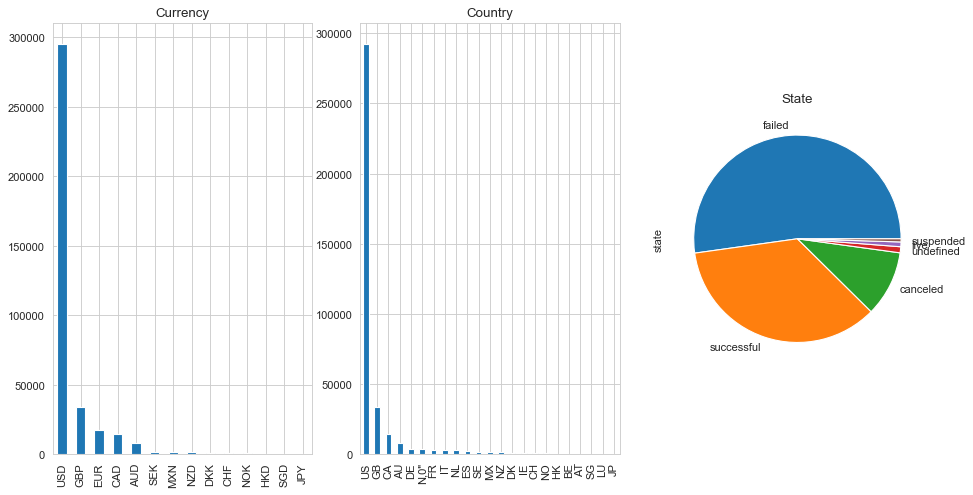

In [56]:
sns.set_style('whitegrid')

fig = plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(131, title='Currency')
df['currency'].value_counts().plot.bar()

currenty = df['currency'].value_counts().plot.bar()
plt.subplot(132, title='Country')
df['country'].value_counts().plot.bar()

plt.subplot(133, title='State')
df['state'].value_counts().plot.pie()
plt.tight_layout(pad=0.0005, w_pad=0.0001, h_pad=2.0)
plt.show()

In [57]:
wo_cl = df['name']
categorical_columns = ['main_category']
df = pd.get_dummies(df, columns=categorical_columns)
df = df[df['state'].isin(['failed', 'successful'])]
df['state'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0)
df = df.drop(columns=['ID', 'name', 'pledged', 'goal', 'usd pledged', 'usd_pledged_real', 'category', 'currency', 'country'], 
             axis=1)
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration_days'] = df['deadline'].subtract(df['launched'])
df['duration_days'] = df['duration_days'].astype('timedelta64[D]')
df = df.drop(columns=['launched', 'deadline'])

In [58]:
print(df.shape)

(331675, 19)


Powyższe wykresy słupkowe wskazują na brak zasadności zastosowania takich cech jak waluta oraz kraj. 

Na wykresie kołowym widać podział projektów ze względu na osiągnięty sukces.

In [59]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '10pt'})

,state,backers,usd_goal_real,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,duration_days
state,1,0.12579,-0.0237352,0.026554,0.0669638,-0.0422245,0.0532701,0.0070765,-0.0621164,0.0129594,-0.0696021,0.0218961,-0.0366924,0.100303,-0.0221908,-0.0400851,-0.100826,0.0851582,-0.116437
backers,0.12579,1,0.00520805,-0.0212751,0.00530402,-0.0139258,-0.00773843,0.0470225,-0.0125014,-0.0205765,-0.0158756,0.0844227,-0.0085482,-0.0241825,-0.013144,-0.0195687,0.0215339,-0.0124293,-4.95513e-05
usd_goal_real,-0.0237352,0.00520805,1,-0.00054237,-0.00336808,-0.00442121,-0.00312217,-0.00084932,-0.00445574,0.0141365,0.00160237,-0.000709238,0.00290158,-0.00979799,-0.0047573,-0.00747578,0.0152005,-0.00295813,0.0216067
main_category_Art,0.026554,-0.0212751,-0.00054237,1,-0.0507138,-0.0449732,-0.0302061,-0.0832933,-0.0728842,-0.131198,-0.0772522,-0.0887837,-0.0325785,-0.116077,-0.0502115,-0.100126,-0.0862548,-0.051669,-0.0369349
main_category_Comics,0.0669638,0.00530402,-0.00336808,-0.0507138,1,-0.0272217,-0.0182833,-0.0504163,-0.0441158,-0.0794124,-0.0467597,-0.0537396,-0.0197193,-0.0702598,-0.0303924,-0.0606047,-0.0522089,-0.0312745,-0.00149212
main_category_Crafts,-0.0422245,-0.0139258,-0.00442121,-0.0449732,-0.0272217,1,-0.0162137,-0.0447094,-0.0391221,-0.0704232,-0.0414667,-0.0476565,-0.0174872,-0.0623066,-0.0269521,-0.0537445,-0.046299,-0.0277344,-0.0306442
main_category_Dance,0.0532701,-0.00773843,-0.00312217,-0.0302061,-0.0182833,-0.0162137,1,-0.0300289,-0.0262762,-0.0472995,-0.027851,-0.0320083,-0.0117452,-0.041848,-0.0181023,-0.0360973,-0.0310966,-0.0186277,-0.00937043
main_category_Design,0.0070765,0.0470225,-0.00084932,-0.0832933,-0.0504163,-0.0447094,-0.0300289,1,-0.0724566,-0.130428,-0.0767991,-0.0882629,-0.0323874,-0.115396,-0.049917,-0.0995384,-0.0857489,-0.0513659,0.00416107
main_category_Fashion,-0.0621164,-0.0125014,-0.00445574,-0.0728842,-0.0441158,-0.0391221,-0.0262762,-0.0724566,1,-0.114129,-0.0672015,-0.0772327,-0.02834,-0.100975,-0.0436789,-0.0870991,-0.0750328,-0.0449467,-0.0265645
main_category_Film & Video,0.0129594,-0.0205765,0.0141365,-0.131198,-0.0794124,-0.0704232,-0.0472995,-0.130428,-0.114129,1,-0.120969,-0.139026,-0.0510145,-0.181764,-0.0786259,-0.156786,-0.135066,-0.0809081,0.0375823


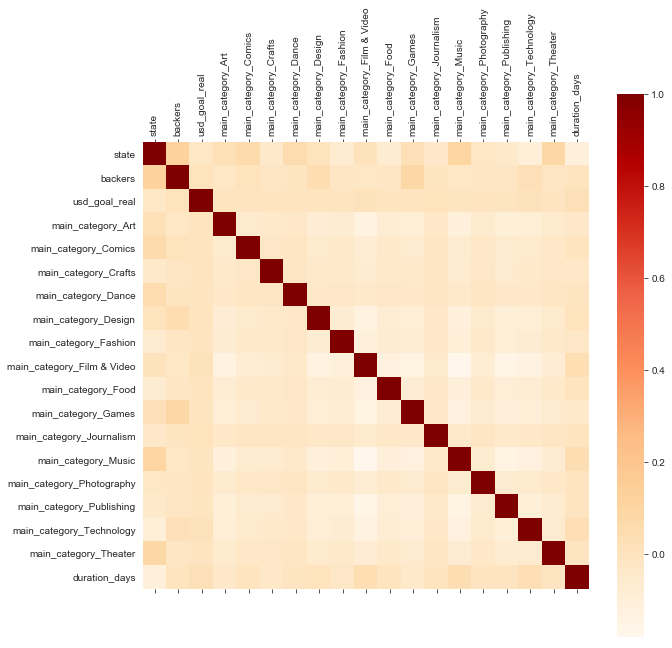

In [60]:
import seaborn as sns


def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(corr)
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="OrRd")
    
  
plot_corr(df)

## BAG OF WORDS

In [61]:
# wo_cl = wo_cl.astype(str)
# wo_cl = wo_cl.str.split()

# wo_cl = wo_cl.apply(lambda x: ' '.join([i for i in x if i not in string.punctuation]))
# wo_cl = wo_cl.str.lower()
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# wo_cl = wo_cl.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# wo_cl = wo_cl.str.split()

# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer("english")
# wo_cl = wo_cl.apply(lambda x: [stemmer.stem(y) for y in x])

# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# vectorizer = TfidfVectorizer()
# bag_of_words = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, max_features=50).fit_transform(wo_cl)
# bow = bag_of_words.toarray()
# bow_df = pd.DataFrame(bow)
# df = pd.merge(df, bow_df, how='left', left_index=True, right_index=True)
# #df = df.drop(columns=['name'], axis=1)

print(bag_of_words.shape)

(378661, 50)


## Usuwanie kolumny "state" - to właśnie będziemy przewidywać. 

In [21]:
X = df.drop(columns=['state'], axis=1)
y = df['state']

## Normalizacja i usuwanie wartości odstających.

In [22]:
sc = preprocessing.StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)

q1 = df['usd_goal_real'].quantile(0.25)
q3 = df['usd_goal_real'].quantile(0.75)
iqr = q3 - q1
down = q1 - 1.5 * iqr
up = q3 + 1.5 * iqr
df['usd_goal_real'] = df['usd_goal_real'][(df['usd_goal_real'] > down) & (df['usd_goal_real'] < up)]
df = df.dropna(axis=0, how='any')

In [23]:
print(df.shape)

(292604, 19)


## Podział na zbiór uczący i testowy.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=101, stratify=y)

ValueError: Found input variables with inconsistent numbers of samples: [331675, 15]

In [64]:
print(X_train.shape)
print(X_test.shape)

(275290, 18)
(56385, 18)


In [65]:
acc_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score)
kfold = KFold(n_splits=5, random_state=11)

## Logistic Regresion

In [18]:
t0=time.time()
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1, max_iter=100).fit(X_train, y_train)
coef_print = pd.DataFrame(logreg.coef_)
res_logreg_acc = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=acc_scorer)
res_logreg_f1 = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=f1_scorer)
acc_logreg = res_logreg_acc.mean()
f1_logreg = res_logreg_f1.mean()
print('Logistic regresion accuracy:\t', acc_logreg)
print('Logistic regresion F1 score:\t', f1_logreg)
#print(coef_print)
print('Time taken :' , time.time()-t0)


Logistic regresion accuracy:	 0.8787024592248175
Logistic regresion F1 score:	 0.836505685156707
Time taken : 23.13142228126526


## KNN z cross walidacją


In [20]:
t0=time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
res_knn_acc = cross_val_score(knn, X_train, y_train, cv=kfold, scoring=acc_scorer)
res_knn_f1 = cross_val_score(knn, X_train, y_train, cv=kfold, scoring=f1_scorer)
acc_knn = res_knn_acc.mean()
f1_knn = res_knn_f1.mean()
print('KNN accuracy:\t',acc_knn)
print('F1 score:\t',f1_knn)
print('Time taken :' , time.time()-t0)

KNN accuracy:	 0.9132115223945657
F1 score:	 0.8941978366526063
Time taken : 981.5106136798859


### Wybór hiperparametru n_neighbors dla KNN

In [ ]:
# k_range = range(5,20)
# k_scores = []
# for k in k_range:
#     print(k)
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
#     k_scores.append(scores.mean())
# print(k_scores)

# MSE = [1-x for x in k_scores]
# optimal_k = k_range[MSE.index(min(MSE))]
# print("The optimal number of neighbors is %d" % optimal_k)

## Random Forest - predykcja

In [27]:
from sklearn.ensemble import RandomForestClassifier

t0=time.time()
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=10,random_state=101, min_samples_leaf=2, criterion="gini")
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
res_rf_acc = cross_val_score(clf_rf, X_train, y_train, cv=kfold, scoring=acc_scorer)
res_rf_f1 = cross_val_score(clf_rf, X_train, y_train, cv=kfold, scoring=f1_scorer)
acc_rf = res_rf_acc.mean()
f1_rf = res_rf_f1.mean()
print('Ranres_rf_f1dom Forest accuracy:\t', acc_rf)
print('Random Forest F1 score:\t', f1_rf)
print('Time taken :' , time.time()-t0)

# for n in range (1,10):
#     clf_rf = RandomForestClassifier(n_estimators=n, max_depth=10,random_state=101, min_samples_leaf=2, criterion="gini")
#     clf_rf.fit(X_train,y_train)
#     y_pred_rf = clf_rf.predict(X_test)
#     acc_cv_rf = cross_val_score(clf_rf, X_train, y_train, cv=kfold, scoring=acc_scorer)
#     f1_cv_rf = cross_val_score(clf_rf, X_train, y_train, cv=kfold, scoring=f1_scorer)
#     print('Random Forest accuracy:\t', acc_cv_rf.mean())
#     print('Random Forest F1 score:\t', f1_cv_rf.mean())
#print('Time taken :' , time.time()-t0)




Ranres_rf_f1dom Forest accuracy:	 0.9253369174325258
Random Forest F1 score:	 0.9090038562656995
Time taken : 38.110952377319336


## Bayes

In [62]:
t0=time.time()
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
clf_gnb.fit(X_train,y_train)
y_pred_gnb = clf_gnb.predict(X_test)
res_gnb_acc = cross_val_score(clf_gnb, X_train, y_train, cv=kfold, scoring=acc_scorer)
res_gnb_f1 = cross_val_score(clf_gnb, X_train, y_train, cv=kfold, scoring=f1_scorer)
acc_gnb = res_gnb_acc.mean()
f1_gnb = res_gnb_f1.mean()
print('Bayes accuracy:\t', acc_gnb)
print('Bayes F1 score:\t', f1_gnb)
print('Time taken :' , time.time()-t0)

Bayes accuracy:	 0.6362744741908533
Bayes F1 score:	 0.6362025135099839
Time taken : 6.033236265182495


## SVM

In [23]:
t0=time.time()
clf_svm = LinearSVC(max_iter = 100000, C=10000, dual=False)
clf_svm.fit(X_train, y_train)
res_svm_acc = cross_val_score(clf_svm, X_train, y_train, cv=kfold, scoring=acc_scorer)
res_svm_f1 = cross_val_score(clf_svm, X_train, y_train, cv=kfold, scoring=f1_scorer)
acc_svm = res_svm_acc.mean()
f1_svm = res_svm_f1.mean()
print('SVM accuracy:\t', acc_svm)
print('SVM F1 score:\t', f1_svm)
print('Time taken :' , time.time()-t0)

SVM accuracy:	 0.8810163827236732
SVM F1 score:	 0.8396711468810665
Time taken : 32.957119941711426


## XGBOOST

In [ ]:
# def run_xgboost_analysis():

#     a = [2, 3, 4, 5, 6, 7, 8, 9, 12, 15]
#     b = [0.09, 1.0, 1.1]
#     c = [50, 100, 150, 200, 250, 300, 320, 350, 400]
#     max_scr = 0
#     max_dep = 0
#     max_len = 0
#     max_n_est = 0
#     for i in a:
#         for j in b:
#             for k in c:
#                 clf_xgbr = XGBClassifier(max_depth=i, learning_rate=j, n_estimators=k)
#                 #
#                 results = cross_val_score(clf_xgbr, X_train, y_train, cv=kfold, scoring=scorer)
#                 #
#                 res_med = np.median(results)
#                 if res_med > max_scr:
#                     max_dep = i
#                     max_len = j
#                     max_n_est = k
#                     max_scr = res_med
#     return max_scr, max_dep, max_len, max_n_est
# #max_scr_1, max_dep_1, max_len_1, max_n_est_1 = run_xgboost_analysis()
# #print('Best score is {0}, for parameters depth {1}, learning rate {2}, 
# print('Xgboost accuracy (max_depth=6, learning_rate=1.0, n_estimators=150): ', 0.923)

In [32]:
t0=time.time()
clf_xgbr = XGBClassifier(max_depth=6, learning_rate=1.0, n_estimators=150)
clf_xgbr.fit(X_train, y_train)
res_xgbr_acc = cross_val_score(clf_xgbr, X_train, y_train, cv=kfold, scoring=acc_scorer)
res_xgbr_f1 = cross_val_score(clf_xgbr, X_train, y_train, cv=kfold, scoring=f1_scorer)
acc_xgbr = res_xgbr_acc.mean()
f1_xgbr = res_xgbr_f1.mean()
print('SVM accuracy:\t', acc_xgbr)
print('SVM F1 score:\t', f1_xgbr)
print('Time taken :' , time.time()-t0)

SVM accuracy:	 0.9278179374477823
SVM F1 score:	 0.9109916988736634
Time taken : 458.0158348083496


## WYNIKI 

In [29]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 
              'Random Forest', 'Bayes',  
              'Linear SVC', 'XGBoost'],
    'Score': [acc_logreg, acc_knn, acc_rf, acc_gnb, acc_svm, acc_xgbr]})

models.sort_values(by='Score', ascending=False)

,Model,Score
5,XGBoost,0.927818
2,Random Forest,0.925337
1,KNN,0.913212
4,Linear SVC,0.881016
0,Logistic Regression,0.878702
3,Bayes,0.636274


## Wybór najlepszych modeli i predykcja (XGBoost oraz Random Forest)

## Random Forest 

In [30]:
t0=time.time()

y_pred_rf = clf_rf.predict(X_test)
score_pred_acc = accuracy_score(y_test,y_pred_rf)
score_pred_f1 = f1_score(y_test,y_pred_rf) 
score_pred_cm = confusion_matrix(y_test,y_pred_rf) 
score_pred_roc = roc_auc_score(y_test,y_pred_rf) 
print('Accuracy :',score_pred_acc)
print('F1 score :',score_pred_f1)
print('Confusion Matrix :\n',score_pred_cm)
print('ROC :',score_pred_roc)

print('Time taken :' , time.time()-t0)

Accuracy : 0.9238981998758535
F1 score : 0.9082668832973471
Confusion Matrix :
 [[30851  2761]
 [ 1530 21243]]
ROC : 0.9253359468525121
Time taken : 0.21721434593200684


## XGBoost - predykcja

In [33]:
t0=time.time()

y_pred_rf = clf_xgbr.predict(X_test)
score_pred_acc = accuracy_score(y_test,y_pred_rf)
score_pred_f1 = f1_score(y_test,y_pred_rf) 
score_pred_cm = confusion_matrix(y_test,y_pred_rf) 
score_pred_roc = roc_auc_score(y_test,y_pred_rf) 
print('Accuracy :',score_pred_acc)
print('F1 score :',score_pred_f1)
print('Confusion Matrix :\n',score_pred_cm)
print('ROC :',score_pred_roc)

print('Time taken :' , time.time()-t0)

Accuracy : 0.927569389021903
F1 score : 0.9110588440263079
Confusion Matrix :
 [[31384  2228]
 [ 1856 20917]]
ROC : 0.9261070638763063
Time taken : 0.674372673034668


## WORLD CLOUD

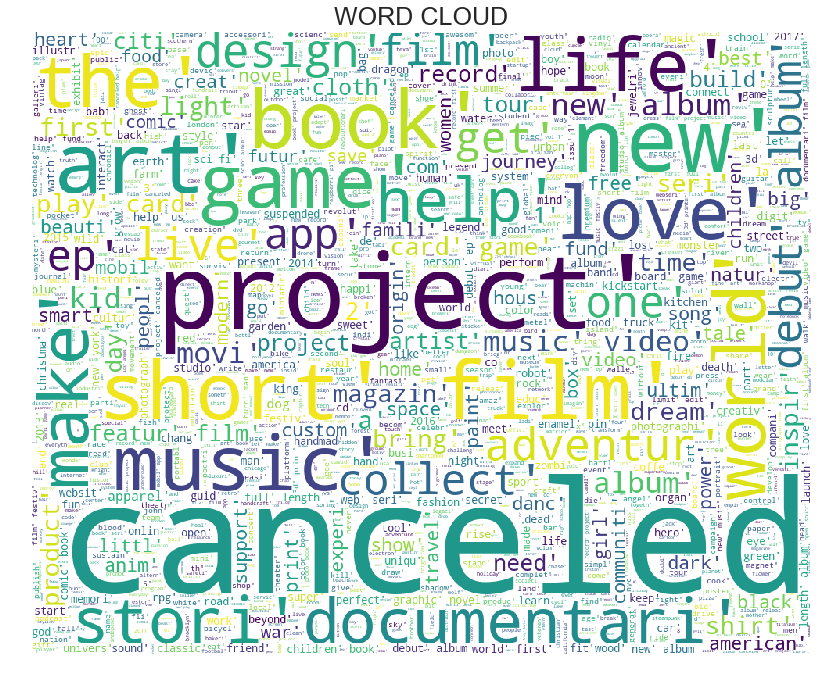

In [66]:
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=12
).generate(" ".join(wo_cl.dropna().astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (14,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD",fontsize=25)
plt.axis('off')
plt.show()